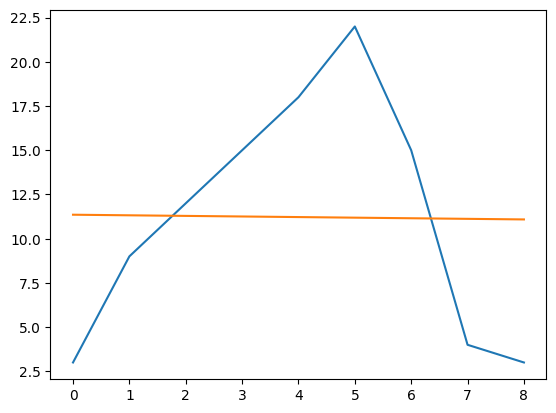

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

ser = pd.Series([3,9,12,15,18, 22,15, 4, 3])

x = np.array(range(len(ser)))
y = np.array(ser)
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred = lr.predict(x.reshape(-1,1))

plt.plot(x, y, '-')
plt.plot(x, y_pred)
plt.show()

In [50]:
range( 1, len(ser)) 

range(1, 35)

0.006949806949806952
mean -0.4444444444444444


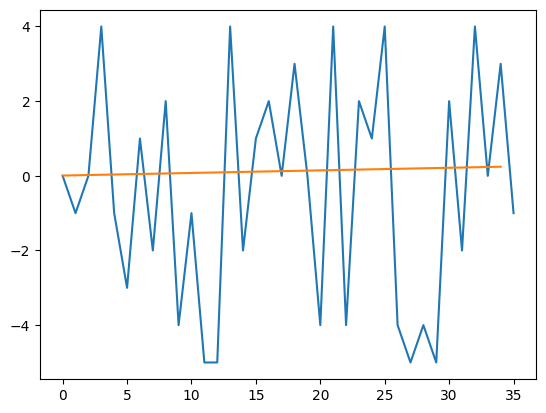

In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# calculate slope of the series (trend)
def slope(ser):
    '''
    Calculates the normilized slope of a pandas Series.
        INPUT: ser - pandas Series
        OUTPUT: slope - float
    '''
    x = np.array(range(len(ser)))
    x = (x - x.min())/(x.max() - x.min())
    x = x.reshape(-1,1)

    y = ser.values
    y = (y - y.min())/(y.max() - y.min())
    y = y.reshape(-1,1)

    lr = LinearRegression()
    lr.fit(x, y)
    return lr.coef_[0][0]


# test this function and plot the results
ser = pd.Series(np.append(np.array(0),(np.random.randint(-5, 5, 35))))
print(slope(ser))
print (f'mean {ser.mean()}')
plt.plot(ser)
# plot slope as well  
plt.plot([slope(ser)*x for x in range(1, len(ser))])

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices())
import sys
# sys.path.append("/home/folongton/.local/bin")
sys.path

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


['/workspaces/P7-Trading-Bot/notebooks/TESTS',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/home/folongton/.local/lib/python3.11/site-packages',
 '/workspaces/P7-Trading-Bot',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages']

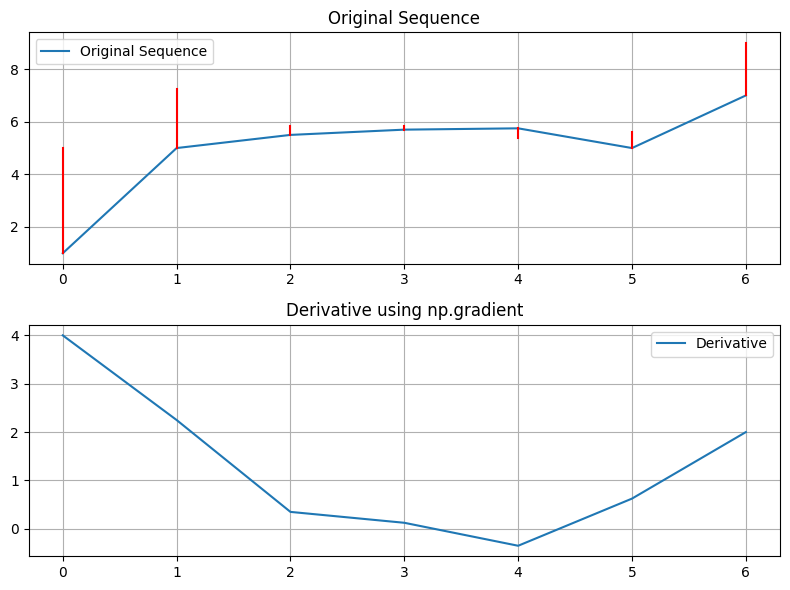

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define your sequence (array) here
y = np.array([1, 5, 5.5, 5.7, 5.75, 5, 7])
x = np.arange(0, len(y))

# Determine the spacing between the points
# Note: Make sure the spacing is appropriate for the given sequence
dx = 1  # For this example, we assume the spacing is 1

# Use np.gradient to calculate the numerical derivative
derivatives = np.gradient(y, dx)

# Plot the original sequence and its derivative
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(y, label='Original Sequence')
# add grid lines
plt.grid(True)
plt.legend()
plt.title('Original Sequence')
for i in range(len(y)):
    plt.plot([i, i], [y[i], y[i] + derivatives[i]], 'r-')   


plt.subplot(2, 1, 2)
plt.plot(derivatives, label='Derivative')
plt.grid(True)
plt.legend()
plt.title('Derivative using np.gradient')

plt.tight_layout()
plt.show()


In [9]:
import tensorflow as tf
import numpy as np

# Define the input sequence and its corresponding target sequence
input_sequence = ['hello', 'hi', 'goodbye', 'hey']
target_sequence = ['bonjour', 'salut', 'au revoir', 'salut']

# Creating vocabulary sets
input_vocab = sorted(set(' '.join(input_sequence)))
target_vocab = sorted(set(' '.join(target_sequence)))

# Creating dictionaries to convert characters to integers and vice versa
input_vocab_to_int = {c: i for i, c in enumerate(input_vocab)}
target_vocab_to_int = {c: i for i, c in enumerate(target_vocab)}
int_to_input_vocab = {i: c for i, c in enumerate(input_vocab)}
int_to_target_vocab = {i: c for i, c in enumerate(target_vocab)}

# Maximum sequence length for padding
max_sequence_length = max([len(seq) for seq in input_sequence + target_sequence])

# Convert sequences to integer arrays
input_sequences_int = [[input_vocab_to_int[c] for c in seq] + [0] * (max_sequence_length - len(seq)) for seq in input_sequence]
target_sequences_int = [[target_vocab_to_int[c] for c in seq] + [0] * (max_sequence_length - len(seq)) for seq in target_sequence]

In [ ]:
# Define the model
encoder_inputs = tf.keras.layers.Input(shape=(max_sequence_length,))
encoder_embedding = tf.keras.layers.Embedding(len(input_vocab), 64, input_length=max_sequence_length)(encoder_inputs)
encoder_lstm, *encoder_states = tf.keras.layers.LSTM(64, return_state=True)(encoder_embedding)

decoder_inputs = tf.keras.layers.Input(shape=(max_sequence_length,))
decoder_embedding = tf.keras.layers.Embedding(len(target_vocab), 64, input_length=max_sequence_length)(decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(64, return_sequences=True)(decoder_embedding, initial_state=encoder_states)
decoder_outputs = tf.keras.layers.Dense(len(target_vocab), activation='softmax')(decoder_lstm)

model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Training the model
input_sequences_int = np.array(input_sequences_int)
target_sequences_int = np.array(target_sequences_int)

model.fit([input_sequences_int, target_sequences_int], np.expand_dims(target_sequences_int, -1), batch_size=2, epochs=50)

# Predicting using the model
sample_input = np.array([input_sequences_int[0]])
predicted_output = model.predict([sample_input, sample_input])
print("Predicted Output: ", predicted_output)